# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.357364e+01     1.698271e+01
 * time: 0.004873991012573242
     1     6.164414e+01     1.029462e+01
 * time: 0.13634586334228516
     2     5.591470e+01     1.194657e+01
 * time: 0.1640779972076416
     3     4.004223e+01     8.541704e+00
 * time: 0.19413399696350098
     4     3.032087e+01     7.660411e+00
 * time: 0.22502589225769043
     5     2.575822e+01     6.998069e+00
 * time: 0.2517409324645996
     6     1.206028e+01     2.086593e+00
 * time: 0.2816760540008545
     7     1.138214e+01     4.905402e+00
 * time: 0.2993960380554199
     8     1.016087e+01     3.184776e+00
 * time: 0.32930588722229004
     9     9.236410e+00     2.801481e+00
 * time: 0.42207789421081543
    10     7.884158e+00     2.645208e+00
 * time: 0.44440603256225586
    11     7.358463e+00     2.985632e+00
 * time: 0.4617588520050049
    12     6.691536e+00     2.183477e+00
 * time: 0.4794929027557373
    13     6.298222e+00     1.807729e+00
 * time: 0.50

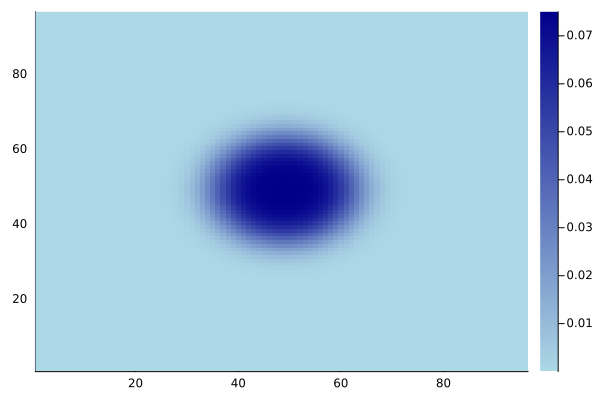

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)